### User Engagement Analysis


In [1]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# os.chdir('..')


In [2]:
import sys
sys.path.append('..')

In [7]:
xdr_data = pd.read_csv("../data/processed/xdr_data1.csv")
final_df = pd.read_csv("../data/processed/final_df.csv")

#### Aggregate metrics per customer


In [8]:
from scripts.tellcoAnalysis import analyze_user_engagement
aggregated_data_user_engagement, cluster_stats_user_engagement, top_10_most_engaged_users,normalized_data,engagement_clusters = analyze_user_engagement(xdr_data)

In [9]:
aggregated_data_user_engagement.head()


,Bearer Id,Dur. (ms),Total_DL_+_UL,clusters
MSISDN/Number,,,,
33601.675528,3.603373e+15,34112179.0,182951.226284,2
33601.712373,1.311448e+13,38503.0,339.616950,0
33601.712551,6.917538e+12,52478.0,900.610946,0
33601.713789,1.462771e+13,120298.0,1587.337140,0
33601.714799,1.311448e+13,176022.0,178.330679,0


#### Top 10 most engaged users per application


In [10]:
print(top_10_most_engaged_users)


MSISDN/Number  Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube UL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other UL (Bytes)
33674.923685   10.979931          3.515773           2.432643          0.631541          21.501662           11.302577           12.156548           19.682682           840.912532         15.082146          14.698593           953.624448
33664.689058   11.183808          3.873619           1.601413          0.933002          16.468684           13.064265           17.807619           21.802237           842.772173         8.811089           11.232779           952.641334
33668.551754   9.458813           1.516648           2.004712          0.342808          21.646758           23.101979           22.409092           8.244742            835.939605         10.097405          15.894385           952.307464
33658.809959   6.073984           1.061234           3.176224 

#### K-means clustering


#### Calculate cluster metrics


In [11]:
cluster_stats_user_engagement.head()


Bearer Id                                            \
                   min           max          mean           sum   
clusters                                                           
0         6.917538e+12  2.217933e+14  1.410195e+13  1.269684e+18   
1         2.475544e+17  2.475544e+17  2.475544e+17  2.475544e+17   
2         3.603373e+15  3.603373e+15  3.603373e+15  3.603373e+15   

             Dur. (ms)                                            \
                   min           max          mean           sum   
clusters                                                           
0         7.146000e+03  4.135260e+06  1.384787e+05  1.246807e+10   
1         2.433741e+09  2.433741e+09  2.433741e+09  2.433741e+09   
2         3.411218e+07  3.411218e+07  3.411218e+07  3.411218e+07   

         Total_DL_+_UL                                            
                   min           max          mean           sum  
clusters                                                          
0         3.324901e+01  8.846226e+03  6.903631e+02  6.215753e+07  
1         1.202471e+07  1.202471e+07  1.202471e+07  1.202471e+07  
2         1.829512e+05  1.829512e+05  1.829512e+05  1.829512e+05

In [12]:
cluster_one = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==0]
cluster_two = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==1]
cluster_three = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==2]

In [13]:
# Find top 10 customers per engagement metric
top_frequency = aggregated_data_user_engagement['Bearer Id'].nlargest(10)
top_duration = aggregated_data_user_engagement['Dur. (ms)'].nlargest(10)
top_traffic = aggregated_data_user_engagement['Total_DL_+_UL'].nlargest(10)

#### Top Ten sessions frequencies


In [14]:
print(top_frequency)


MSISDN/Number
33734.564203    2.475544e+17
33601.675528    3.603373e+15
33625.779332    2.217933e+14
33659.725664    2.088229e+14
33675.877202    1.960687e+14
33667.163239    1.695515e+14
33627.080969    1.568694e+14
33659.359429    1.435387e+14
33669.068942    1.434667e+14
33626.320676    1.315773e+14
Name: Bearer Id, dtype: float64


<Axes: xlabel='MSISDN/Number'>

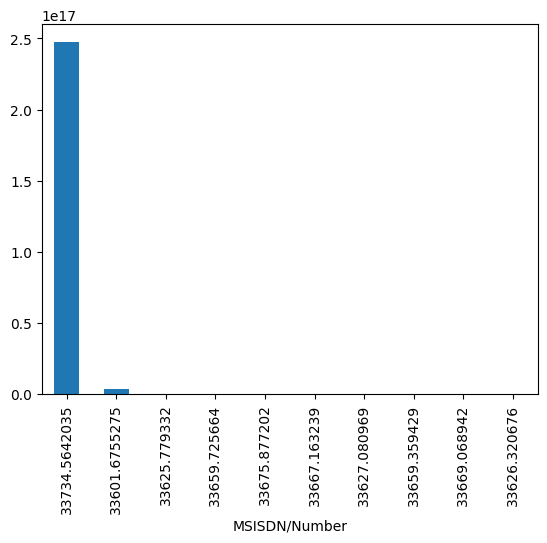

In [15]:
top_frequency.plot(kind='bar')
